<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_04_reg_multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio 05
**Por: Juliana del valle**

Objetivo: Programar una regresión multivariada


1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano. 

- Realizar un diagrama 3D de los puntos generados aleatoriamente. 


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados. 

2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.
3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.
4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):
 
  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

5. Aplicar el gradiente descendente: 
  - Encontrar el gradiente.
    $\nabla J$ = \Lambda X.T
  
  - Actualizar los nuevos parametros: 
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$


6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano. 








In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1)
Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano. 

- Realizar un diagrama 3D de los puntos generados aleatoriamente. 


In [2]:
#Datos
n =2 # Número de caracteristicas
m = 100 #número de datos.

#construye la matriz X
X= np.ones((n+1, m)) #la primera fila de X es de 1's
X[1,:] = np.random.rand(m)*10 #x1
X[2,:] = np.random.rand(m)*10 #x2

y = X.transpose() @ np.array([0, 2.1, -3.1]).transpose()

In [3]:
X[:, :3] #primer bloque 3x3

array([[1.        , 1.        , 1.        ],
       [8.44095162, 2.38065654, 5.19427902],
       [1.6455329 , 2.98460909, 4.49701135]])

In [4]:
y[:3]

array([12.62484641, -4.25290945, -3.03274924])

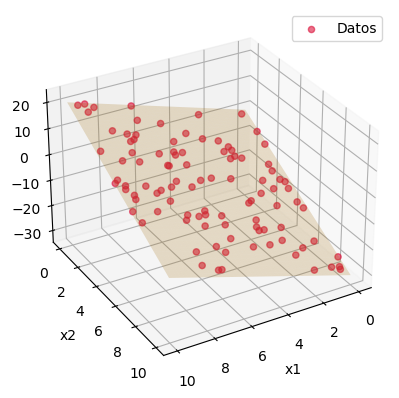

In [5]:
# Configuración de la figura 
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Cambia la perspectiva de la gráfica
ax.view_init(elev=30, azim=60)  

#Grafica el plano
X1, X2 = np.meshgrid(np.linspace(0,10), np.linspace(0,10))
Z = 2.1*X1 - 3.1*X2
ax.plot_surface(X1, X2, Z, alpha=0.2, color="orange")

#grafica los datos
ax.scatter(X[1,:], X[2,:], y, marker="o", alpha=0.6, color="crimson", label="Datos")

# Etiquetas de los ejes
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend();

### 2)
Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.


In [6]:
#Se define theta como un vector columna
theta = np.random.rand(3, 1)*8 -4
print("Se inicializa θ en")
print(theta)

Se inicializa θ en
[[-2.99218545]
 [ 3.2452509 ]
 [ 2.8105644 ]]


## 3)
Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [7]:
#Datos
n =2 # Número de caracteristicas
m = 100 #número de datos.

#construye la matriz X
X= np.ones((n+1, m)) #la primera fila de X es de 1's
X[1,:] = np.random.rand(m)*10 #x1
X[2,:] = np.random.rand(m)*10 #x2

y = X.transpose() @ np.array([0, 2.1, -3.1]).transpose()
#hace que y sea un vector columna
y = y.reshape((m,1))

In [8]:
X[:, :3] #primer bloque 3x3

array([[1.        , 1.        , 1.        ],
       [5.11599893, 2.35810718, 6.85488964],
       [2.90422827, 6.08945325, 8.02398485]])

### 4)
Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):
 
  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $


In [9]:
#El modelo h
h = theta.transpose() @ X 
#hace que h sea un vector columna
h = h.reshape((m, 1))

#La función coste es la norma al cuadrado de lambda
J  = (h -y).transpose() @ (h -y)
J

array([[144006.56178838]])

### 5)  y 6)
Aplicar el gradiente descendente: 
- $J(\theta_1,\theta_2,\theta_3, ...,\theta_n ) = \frac{1}{2m} (\Theta ^ T X - y)^T (\Theta ^ T X - y)$

- $ \nabla _{\theta} J = \frac{1}{m}( (X X^T) \Theta - X y)$

Nota: cambie la notación porque se toma X como 

\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano. 






In [10]:
#En la notación del notebook el gradiente es un vector columna 3x3
grad_J = (X@X.transpose())@theta - X@y
print("El gradiente de J evaluado en θ_0 es:")
print(grad_J)

El gradiente de J evaluado en θ_0 es:
[[ 3406.3612727 ]
 [16951.0691826 ]
 [22804.21800868]]


In [11]:
# Define la taza de aprendizaje
alpha = 0.00001

#hace 50000 ciclos
for _ in range(50000):
    grad_J = (X@X.transpose())@theta - X@y
    #print(f"grad{grad_J}")
    theta = theta - alpha*grad_J
    #print(theta)

theta

array([[-2.95686105e-03],
       [ 2.10020176e+00],
       [-3.09970154e+00]])

In [12]:
print("Los parámetros encontrados con gradiente desendiente son:")
print(np.round(theta, 2))

Los parámetros encontrados con gradiente desendiente son:
[[-0. ]
 [ 2.1]
 [-3.1]]
